## AGAME Workflow. XGBoost model


In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib.dates import DateFormatter
pd.options.mode.chained_assignment = None 

In [9]:
def plot_observed_vs_predicted_with_text(y_test, y_pred_test, site, mse, rmse, mae, r2, params, target_col,plot_directory):
    # Plotting the observed vs predicted values for the test set
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(y_test.index), y_test, label='Observed', color='blue', linestyle='-')
    plt.plot(pd.to_datetime(y_test.index), y_pred_test, label='Predicted', color='red', linestyle='--')
    plt.xlabel('TIMESTAMP')
    plt.ylabel('Value')
    plt.title('Observed vs Predicted '+site)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()  # Rotate and align the date labels
    plt.text(0.86, 0.81, f'MSE : {mse:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.76, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)
    # plt.text(0.86, 0.71, f'R^2: {r2:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.71, f'MAE: {mae:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.66, f'R^2 : {r2:.3f}', transform=plt.gca().transAxes)
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(plot_directory,f"XGBOOST_{site}_{target_col}_{params}.png"))
    plt.show()
    
def plot_observed_vs_predicted_with_text1(y_test, y_pred_test, site, mse, rmse, mae, r2, params, target_col,plot_directory):
    # only for prediction
    # Plotting the observed vs predicted values for the test set
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(y_test.index), y_test, label='Observed', color='blue', linestyle='-')
    plt.plot(pd.to_datetime(y_test.index), y_pred_test, label='Predicted', color='red', linestyle='--')
    plt.xlabel('TIMESTAMP')
    plt.ylabel('Value')
    plt.title('Observed vs Predicted '+site)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    # plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()  # Rotate and align the date labels
    plt.text(0.86, 0.81, f'MSE : {mse:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.76, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)
    # plt.text(0.86, 0.71, f'R^2: {r2:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.71, f'MAE: {mae:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.66, f'R^2 : {r2:.3f}', transform=plt.gca().transAxes)
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(plot_directory,f"XGBOOST_{site}_{target_col}_{params}.png"))
    plt.show()
    # plt.savefig(f'./plots/{site}_observed_vs_predicted.png')

def XGBoost_train_test_no_L(df, target_col, param_values, params, plot_directory, site, test_size=0.2):

    eta = param_values['eta']
    max_depth = param_values['max_depth']
    min_child_weight = param_values['min_child_weight']
    gamma = param_values['gamma']
    alpha = param_values['alpha']

    # Split data into features (X) and target variable (y)
    X = df.reindex(sorted(df.columns), axis=1).drop(columns=[target_col])  
    y = df[target_col]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Initialize XGBoost model
    model = XGBRegressor(eta=eta,
                         max_depth=max_depth,
                         min_child_weight=min_child_weight,
                         gamma=gamma, 
                         alpha=alpha)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)

    plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mae, test_r2, params, target_col, plot_directory)

    return model, X_train, X_test, y_train, y_test, y_pred, mse, rmse, mae, test_r2

def XGBoost_train_test_cont_no_L(model, site, df, target_col, params, plot_directory, test_size=0.2):

    # Split data into features (X) and target variable (y)
    X = df.reindex(sorted(df.columns), axis=1).drop(columns=[target_col])  # Drop the target column
    y = df[target_col]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)

    plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mae, test_r2, params, target_col, plot_directory)

    return model, X_train, X_test, y_train, y_test, y_pred, mse,rmse,mae, test_r2

def f_importance(model, X_train, site, params, plot_directory,  target_col = 'GPP_DT_VUT_USTAR50'):
    importance = model.feature_importances_
    importance_dict = {X_train.columns[i]: importance[i] for i in range(len(X_train.columns))}
    sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)
    print(sorted_importance)
    # Plot feature importance
    plot_importance(model, max_num_features=15)  # Shows top 10 features
    plt.savefig(os.path.join(plot_directory,f"feature_importance_XGBOOST_{site}_{target_col}_{params}.png"))
    plt.show()

def test_predict(model, df, columns, target_col, site, plot_directory,params):

    # Split data into features (X) and target variable (y)
    X = df.reindex(sorted(df.columns), axis=1).drop(columns=[target_col])  # Drop the target column
    # X = df
    y = df[target_col]

    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)  
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", r2)

    plot_observed_vs_predicted_with_text1(y, y_pred, site, mse, rmse, mae, r2, params, target_col,plot_directory)
    return mse, rmse, mae, r2


def predict_all(sites_table, files, model, params, column, plot_directory, directory_data, target_col):
    
    mse_list,rmse_list, mae_list ,r2_list = [],[],[],[]

    for file in files:
        site_id = file.split('_')[0] 
        index = sites_table.index[sites_table['sites_ids'] == site_id].tolist()
        print (site_id, index)

        data = pd.read_csv(os.path.join(directory_data, file), index_col='TIMESTAMP', parse_dates=['TIMESTAMP']) 
        test = data[column]
        mse, rmse, mae, r2 = test_predict(model, test, column, target_col, file.replace(".csv", ""), plot_directory, params)
        
        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)

        sites_table.loc[index[0], 'mse'] = mse
        sites_table.loc[index[0], 'rmse'] = rmse
        sites_table.loc[index[0], 'mae'] = mae
        sites_table.loc[index[0], 'r2'] = r2

    print('\n')
    print("average MSE", np.mean(mse_list))     
    print("average RMSE", np.mean(rmse_list))
    print("average MAE", np.mean(mae_list))
    print("average R2", np.mean(r2_list))

    return sites_table

def retrain_XGBOOST_3(files,columns, target_col, param_values, plot_directory,params,  directory_data):
    
    def setup_model(file_id):
        filename = files[file_id]
        data = pd.read_csv(os.path.join(directory_data, filename), index_col='TIMESTAMP', parse_dates=['TIMESTAMP']) 
        site = filename.split('_')[0] 
        df = data[columns]
        return df, site
    
    def evaluate_model(site, model, X_test, y_test):
        print('\n'+site)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        test_r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        print('Mean Squared Error:', mse)
        print('Root Mean Squared Error:', rmse)
        print('MAE:', mae)
        print("Test R^2 Score:", test_r2)
        plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mae, test_r2, params, target_col,plot_directory)

        return mse, test_r2, mae, rmse, y_pred

    def show_uncertainty(site, mse, rmse, mae, test_r2, y_test, y_pred):
        print('\n'+site)
        print('Mean Squared Error:', mse)
        print('Root Mean Squared Error:', rmse)
        print('MAE:', mae)
        print("Test R^2 Score:", test_r2)
        plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mae, test_r2, params, target_col, plot_directory)
        
    print(f'Training and testing the model on the first site')
    df, site0 = setup_model(0)
    model_0, X_train_0, X_test_0, y_train_0, y_test_0, y_pred_0, mse_0, rmse_0, mae_0, test_r2_0 = XGBoost_train_test_no_L(df, target_col, param_values, params, plot_directory, site0, test_size=0.2)
    f_importance(model_0, X_train_0, site0, params, plot_directory)
    
    #-------------------------------------------------------------------------------------
    print('Retraining the model on the second site')
    df, site1 = setup_model(1)
    model_1, X_train_1, X_test_1, y_train_1, y_test_1, y_pred_1, mse_1, rmse_1, mae_1, test_r2_1 = XGBoost_train_test_cont_no_L(model_0, site1, df, target_col, params, plot_directory, test_size=0.2)
    f_importance(model_1, X_train_1, site1, params, plot_directory)
    
    print('Retesting the model on the first site')
    mse, test_r2, mae, rmse, y_pred_0  = evaluate_model(site0, model_1, X_test_0, y_test_0)
    show_uncertainty(site1, mse_1, rmse_1, mae_1, test_r2_1, y_test_1, y_pred_1)
    #-------------------------------------------------------------------------------------
    
    print('Retraining the model on the third site')
    df, site2 = setup_model(2)
    model_2, X_train_2, X_test_2, y_train_2, y_test_2, y_pred_2, mse_2, rmse_2, mae_2, test_r2_2 = XGBoost_train_test_cont_no_L(model_1, site2, df, target_col, params, plot_directory, test_size=0.2)
    f_importance(model_2, X_train_2, site2, params, plot_directory) 

    mse_list,rmse_list, mae_list ,r2_list = [],[],[],[]
    
    print('Retesting the model on the first and second site')

    mse, test_r2, mae, rmse, y_pred_0 = evaluate_model(site0, model_2, X_test_0, y_test_0)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    mse, test_r2, mae, rmse, y_pred_1  = evaluate_model(site1, model_2, X_test_1, y_test_1)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    show_uncertainty(site2, mse_2, rmse_2, mae_2, test_r2_2, y_test_2, y_pred_2) 

    mse_list.append(mse_2)
    rmse_list.append(rmse_2)
    mae_list.append(mae_2)
    r2_list.append(test_r2_2)

    print('\n')
    print("average MSE", np.mean(mse_list))     
    print("average RMSE", np.mean(rmse_list))
    print("average MAE", np.mean(mae_list))
    print("average R2", np.mean(r2_list))

    return model_2, X_test_0.columns

def retrain_XGBOOST(files, columns, target_col, param_values, plot_directory, params, directory_data):
    
    def setup_model(file_id):
        filename = files[file_id]
        data = pd.read_csv(os.path.join(directory_data, filename), index_col='TIMESTAMP', parse_dates=['TIMESTAMP']) 
        site = filename.split('_')[0] 
        df = data[columns]
        return df, site
    
    def evaluate_model(site, model, X_test, y_test):
        print('\n'+site)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        test_r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        print('Mean Squared Error:', mse)
        print('Root Mean Squared Error:', rmse)
        print('MAE:', mae)
        print("Test R^2 Score:", test_r2)
        plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mae, test_r2, params, target_col,plot_directory)

        return mse, test_r2, mae, rmse, y_pred

    def show_uncertainty(site, mse, rmse, mae, test_r2, y_test, y_pred):
        print('\n'+site)
        print('Mean Squared Error:', mse)
        print('Root Mean Squared Error:', rmse)
        print('MAE:', mae)
        print("Test R^2 Score:", test_r2)
        plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mae, test_r2, params, target_col, plot_directory)
    
    
    print(f'Training and testing the model on the first site')
    df, site = setup_model(0)
    print(site)
    model, X_train, X_test, y_train, y_test, y_pred, mse, rmse, mae, test_r2 = XGBoost_train_test_no_L(df, target_col, param_values, params, plot_directory, site, test_size=0.2)
    f_importance(model, X_train, site, params, plot_directory)

    files = files[1:]

    for index, file in enumerate(files):
        print('Retraining the model on the second site')
        df, site = setup_model(index)
        print(site)
        model, X_train, X_test, y_train, y_test, y_pred, mse, rmse, mae, test_r2 = XGBoost_train_test_cont_no_L(model, site, df, target_col, params, plot_directory, test_size=0.2)
        f_importance(model, X_train, site, params, plot_directory)

    return model


def retrain_XGBOOST_single(df, site, files, columns, target_col, param_values, plot_directory, params, directory_data):
    
    def setup_model(file_id):
        filename = files[file_id]
        data = pd.read_csv(os.path.join(directory_data, filename), index_col='TIMESTAMP', parse_dates=['TIMESTAMP']) 
        site = filename.split('_')[0] 
        df = data[columns]
        return df, site
    
    def evaluate_model(site, model, X_test, y_test):
        print('\n'+site)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        test_r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        print('Mean Squared Error:', mse)
        print('Root Mean Squared Error:', rmse)
        print('MAE:', mae)
        print("Test R^2 Score:", test_r2)
        plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mae, test_r2, params, target_col,plot_directory)

        return mse, test_r2, mae, rmse, y_pred

    def show_uncertainty(site, mse, rmse, mae, test_r2, y_test, y_pred):
        print('\n'+site)
        print('Mean Squared Error:', mse)
        print('Root Mean Squared Error:', rmse)
        print('MAE:', mae)
        print("Test R^2 Score:", test_r2)
        plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mae, test_r2, params, target_col, plot_directory)
    
    
    print(f'Training and testing the model on the first site')

    model, X_train, X_test, y_train, y_test, y_pred, mse, rmse, mae, test_r2 = XGBoost_train_test_no_L(df, target_col, param_values, params, plot_directory, site, test_size=0.2)
    f_importance(model, X_train, site, params, plot_directory)

    return model

def setup_model(directory_data, file_id, column):
    filename = file_id
    data = pd.read_csv(os.path.join(directory_data, filename), index_col='TIMESTAMP', parse_dates=['TIMESTAMP']) 
    site = filename.split('_')[0] 
    df = data[column]
    return df, site

def get_trainning_testing_sites(sites_table, directory_data):

    sites_trainning = sites_table[sites_table['trainning'] == 'y']
    #sites_testing = sites_table[sites_table['trainning'] == 'n']
    sites_testing = sites_table.copy()

    sites_trainning  = sites_trainning['sites_ids'].values.tolist()
    sites_testing  = sites_testing['sites_ids'].values.tolist()

    files_in_directory = os.listdir(directory_data)

    # Filter files that start with any of the specified prefixes
    files_testing = [file for file in files_in_directory if any(file.startswith(prefix) for prefix in sites_testing)]
    files_trainning  = [file for file in files_in_directory if any(file.startswith(prefix) for prefix in sites_trainning)]

    # files_trainning =[
    #   'DE-HoH_preprocessed_01012020_31122023.csv',
    #   'IT-Tor_preprocessed_27052017_31122023.csv',
    #   'FI-Hyy_preprocessed_01012019_22092023.csv',
    #   'DE-Har_preprocessed_01012020_16102023.csv',

    #   'DE-Hai_preprocessed_01012019_01102023.csv',
    #   'FR-Mej_preprocessed_01012020_31122023.csv',
    #   'SE-Htm_preprocessed_01012018_31122023.csv',
    #   'BE-Vie_preprocessed_01012021_31122023.csv',

    #   'FR-Bil_preprocessed_01012020_10102023.csv',
    #   #'FR-Fon_preprocessed_01012020_07102023.csv',
    #   'IT-SR2_preprocessed_01012020_31122023.csv',
    #   'CH-Dav_preprocessed_01012020_31122023.csv'
    # ]
    return files_testing, files_trainning


In [10]:
plot_directory_3_sites = r"D:\Proyectos2024\Agame\Output\model_3_sites_era"
directory_model_3_sites = r"D:\Proyectos2024\Agame\Output\model_3_sites_era\xgboost_model_3_sites_era.json" 
plot_directory_11_sites = r"D:\Proyectos2024\Agame\Output\model_12_sites_era"
directory_model_11_sites = r"D:\Proyectos2024\Agame\Output\model_12_sites_era\xgboost_model_12_sites_era.json" 
directory_data = r"D:\Proyectos2024\Agame\Output\Tables"
directory_site_selection = r'D:\Proyectos2024\Agame\Output\sites_selection'

sites_table = pd.read_csv(os.path.join(directory_site_selection,'sites_table_filtered_4y.csv'), sep=';')
files_testing, files_trainning = get_trainning_testing_sites(sites_table, directory_data)

In [11]:
target_col = 'GPP_DT_VUT_REF'

general = [
'lat', 
'lon', 
'elevation', 
'canopy_height', 
'biom_evergreen needleleaf forests',
'biom_grasslands',
'biom_deciduous broadleaf forests',
'biom_mixed forests',
'day',
'month',
'winter',
'spring', 
'summer', 
'fall']

era_var = [
 'LW_IN_ERA',
 'LW_IN_JSB_ERA',
 'PA_ERA',
 'P_ERA',
 'SW_IN_ERA',
 'TA_ERA',
 'VPD_ERA',
 'WS_ERA']

bands = [
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B8A', 
 'B9',
 'B11',
 'B12']

sentinel = [
 'CLr',
 'EVI',
 'EVI2',
 'LSWI', 
 'MNDVI',
 'MNDWI',
 'NDII',
 'NDVI']

In [12]:
s2 =  sentinel.copy()
s2.append(target_col)

s2_era = sentinel.copy()
s2_era.extend(era_var)
s2_era.append(target_col)

s2_era_general = sentinel.copy()
s2_era_general.extend(era_var)
s2_era_general.extend(general)
s2_era_general.append(target_col)

data = pd.read_csv(os.path.join(directory_data, files_testing[0]), index_col='TIMESTAMP', parse_dates=['TIMESTAMP']) 
s2_all = data.columns.values.tolist()
s2_all = sorted([item for item in s2_all if not (item.endswith('_residual') or 
                                                   item.endswith('_trend') or 
                                                   item.endswith('_season'))])

s2_all = sorted([item for item in s2_all if not (item.startswith('CO2') or 
                                                   item.startswith('H_') or 
                                                   # item.startswith('longitude') or 
                                                   # item.startswith('latitude') or 
                                                   item.startswith('LE_'))])

s2_all = [item for item in s2_all if item not in bands]

df_list = []
for file in files_trainning:
    df, site = setup_model(directory_data, file, s2_era_general)
    df_list.append(df)
    print(site)

combined_data = pd.concat(df_list, ignore_index=True)
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

BE-Vie
CH-Dav
DE-Hai
DE-Har
DE-HoH
FI-Hyy
FR-Bil
FR-Mej
IT-SR2
IT-Tor
SE-Htm
SE-Svb


eta_0.1_max_depth_4_min_child_weight_5_gamma_0.1_alpha_0.1
Training and testing the model on the first site
Mean Squared Error: 2.3752585165860602
Root Mean Squared Error: 1.5411873723159233
MAE: 1.0478559851784301
Test R^2 Score: 0.837414684719018


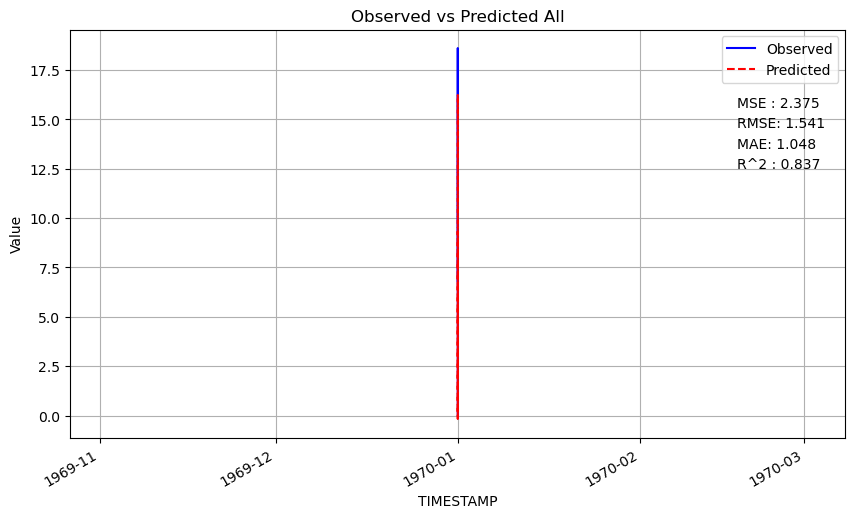

[('TA_ERA', 0.22748646), ('summer', 0.19104746), ('SW_IN_ERA', 0.073393665), ('EVI2', 0.07296048), ('MNDVI', 0.04731561), ('elevation', 0.045507185), ('spring', 0.045382023), ('winter', 0.040909722), ('month', 0.037812237), ('PA_ERA', 0.029417854), ('canopy_height', 0.0242558), ('CLr', 0.022771114), ('lat', 0.02051976), ('biom_deciduous broadleaf forests', 0.019744933), ('LSWI', 0.010921166), ('EVI', 0.01034), ('lon', 0.0095140375), ('MNDWI', 0.008280296), ('biom_grasslands', 0.008000427), ('VPD_ERA', 0.007436901), ('biom_evergreen needleleaf forests', 0.007107592), ('biom_mixed forests', 0.006687984), ('NDVI', 0.006661756), ('P_ERA', 0.0065304423), ('NDII', 0.0063251797), ('LW_IN_JSB_ERA', 0.003409852), ('LW_IN_ERA', 0.0033701053), ('fall', 0.0025156715), ('day', 0.0023676376), ('WS_ERA', 0.0020065727)]


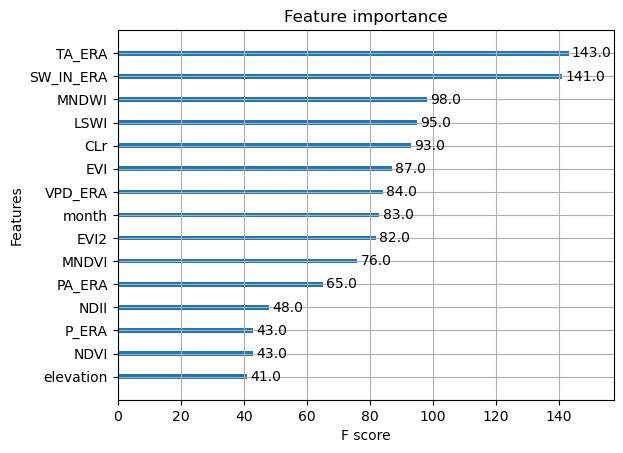

BE-Bra [17]
Mean Squared Error: 4.62695816174951
Root Mean Squared Error: 2.151036531942103
MAE: 1.7352660152667503
Test R^2 Score: 0.7407628942360994


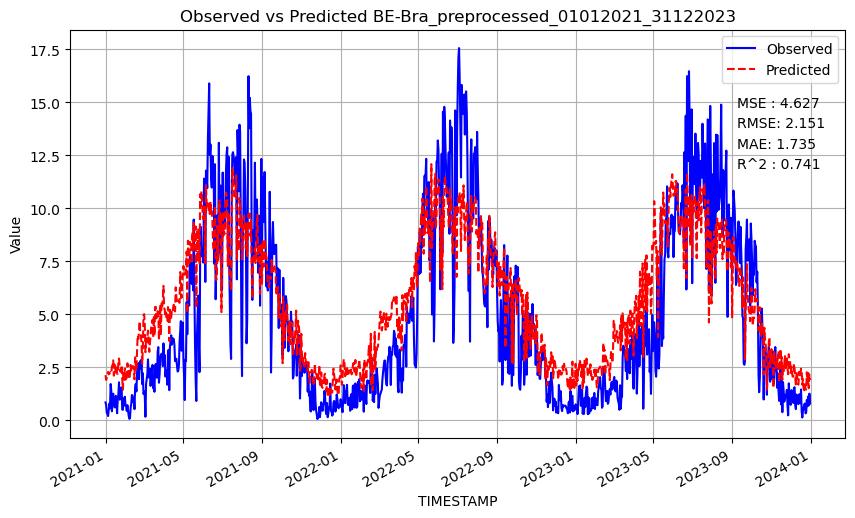

BE-Vie [16]
Mean Squared Error: 2.506713170784042
Root Mean Squared Error: 1.58326029786136
MAE: 1.0988581983400862
Test R^2 Score: 0.7927777021123377


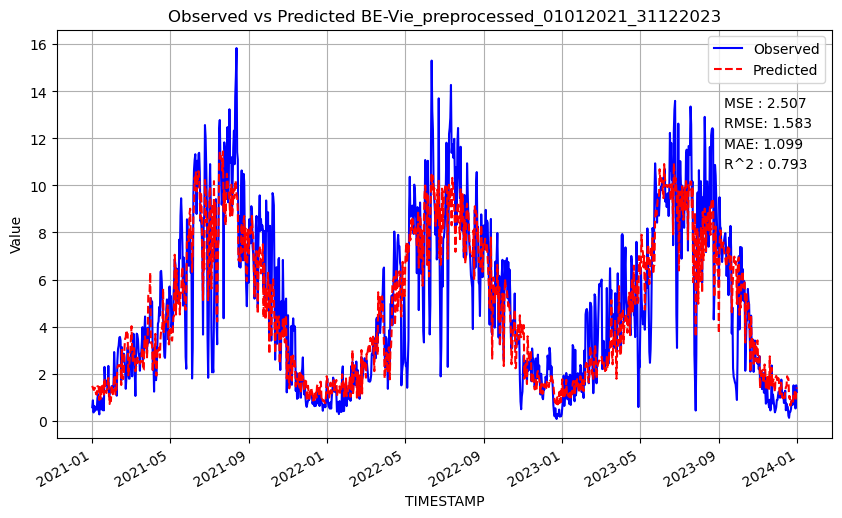

CH-Dav [8]
Mean Squared Error: 1.1281471292467702
Root Mean Squared Error: 1.0621427066297495
MAE: 0.8207275958896155
Test R^2 Score: 0.7538778403039715


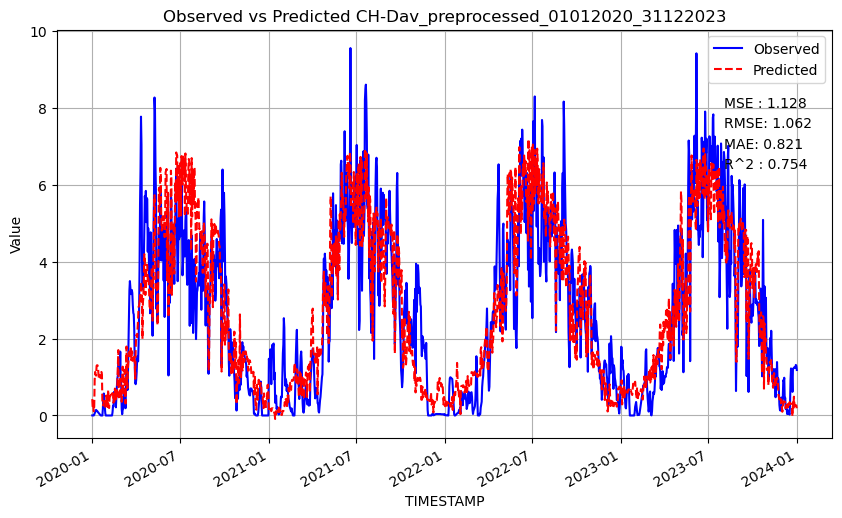

DE-Hai [7]
Mean Squared Error: 1.682971092582877
Root Mean Squared Error: 1.297293757243469
MAE: 0.8702626128509209
Test R^2 Score: 0.8950552428015293


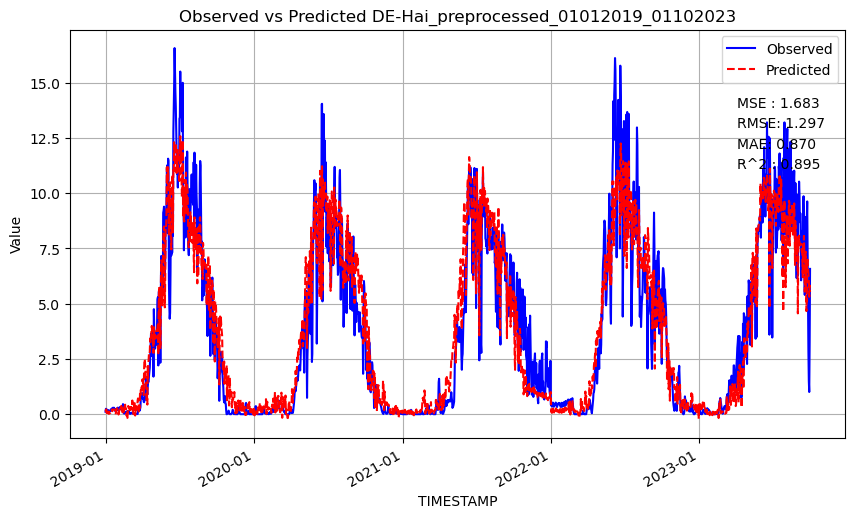

DE-Har [6]
Mean Squared Error: 1.5594658657157154
Root Mean Squared Error: 1.2487857565314058
MAE: 0.8900802315656416
Test R^2 Score: 0.8544652458898746


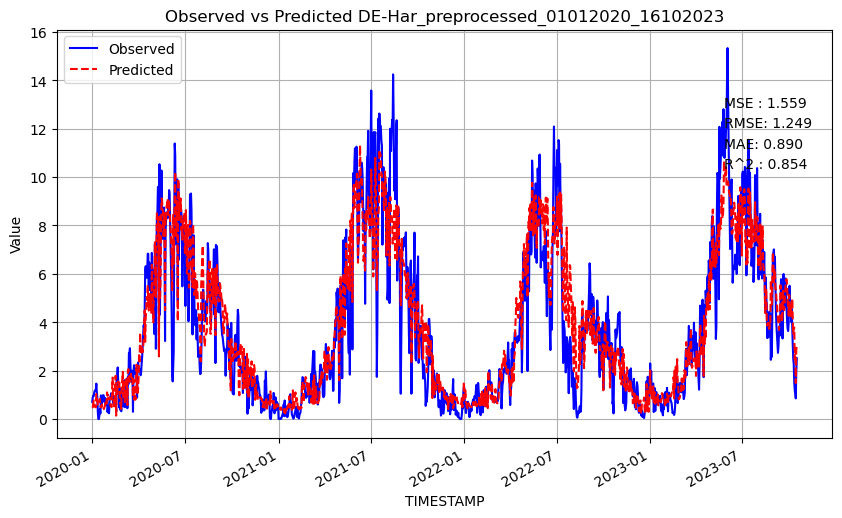

DE-HoH [15]
Mean Squared Error: 1.9259518132450997
Root Mean Squared Error: 1.3877866598454893
MAE: 0.8864883152754592
Test R^2 Score: 0.9334204055942342


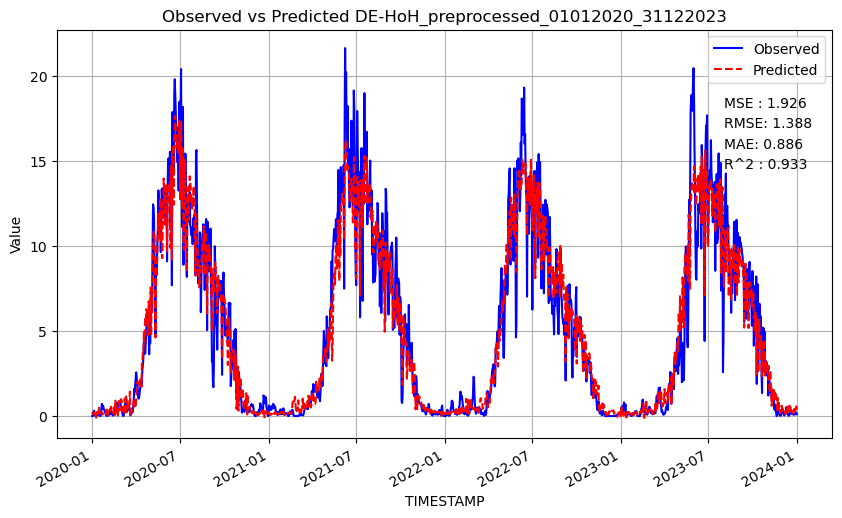

DE-Msr [5]
Mean Squared Error: 5.068808537141068
Root Mean Squared Error: 2.251401460677564
MAE: 1.627696548207079
Test R^2 Score: 0.5492880090215948


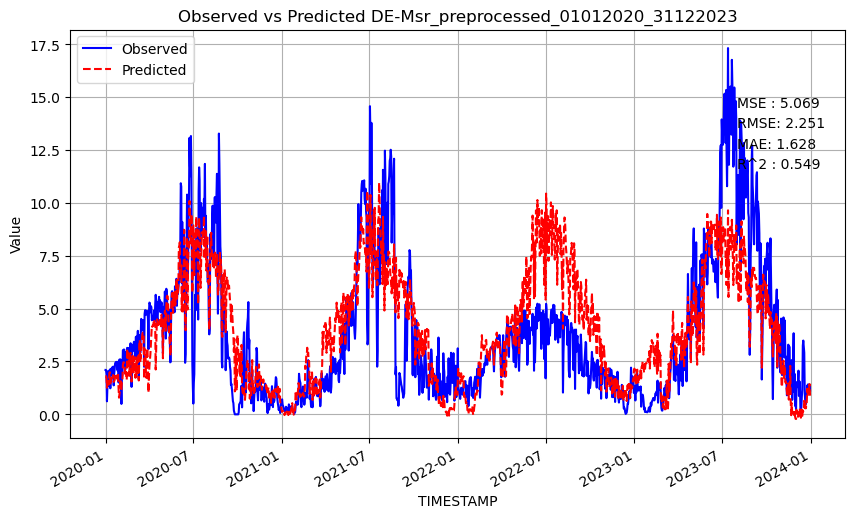

DE-Tha [14]
Mean Squared Error: 2.364093358310974
Root Mean Squared Error: 1.5375608470271913
MAE: 1.1108545004994452
Test R^2 Score: 0.8136515010414556


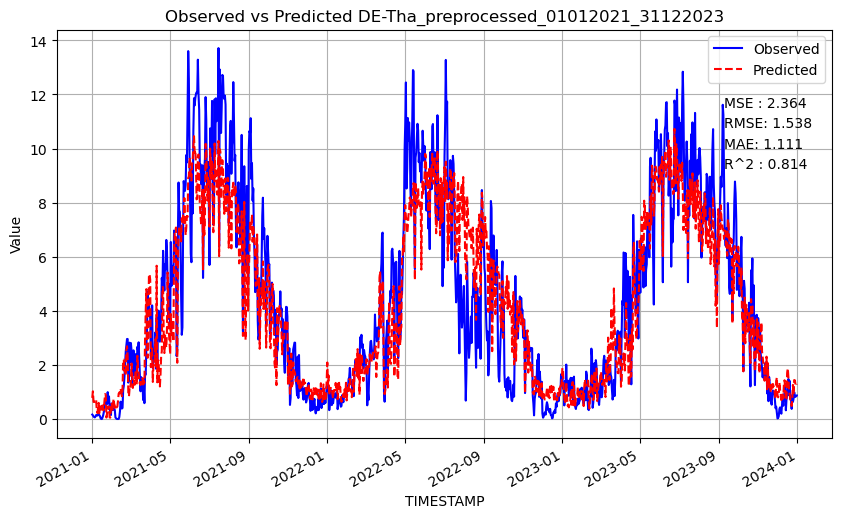

FI-Hyy [13]
Mean Squared Error: 1.0746594369276627
Root Mean Squared Error: 1.0366578205597365
MAE: 0.6756276674792826
Test R^2 Score: 0.9014739802015819


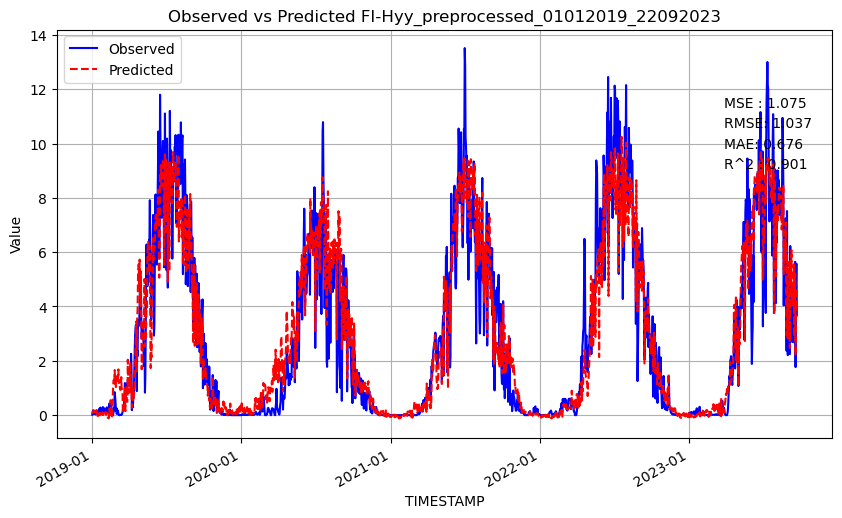

FR-Bil [12]
Mean Squared Error: 2.9106970932243086
Root Mean Squared Error: 1.7060765203308756
MAE: 1.2898243623676224
Test R^2 Score: 0.7437968403134281


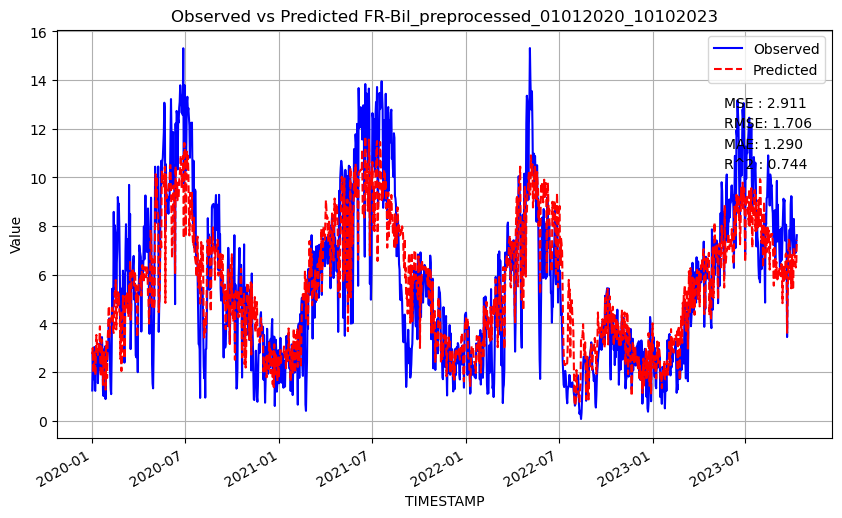

FR-Fon [11]
Mean Squared Error: 4.500958905891726
Root Mean Squared Error: 2.121546347806648
MAE: 1.6522305345495196
Test R^2 Score: 0.8111486338145479


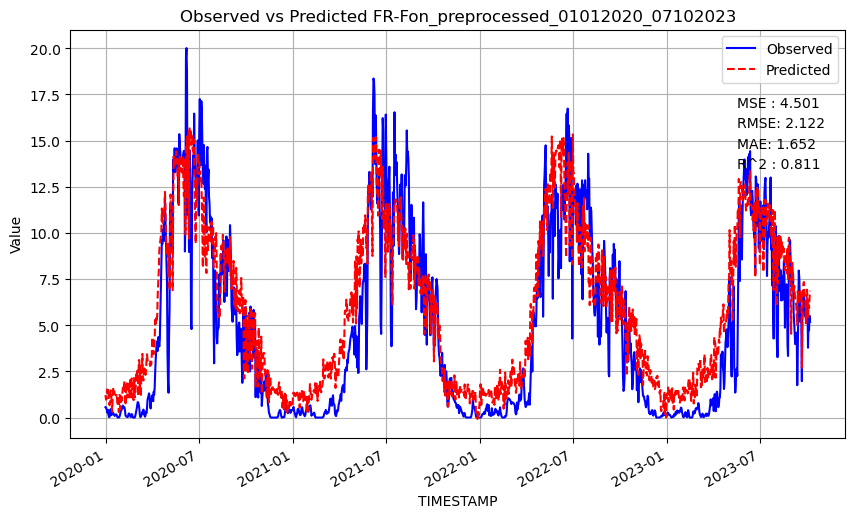

FR-Mej [4]
Mean Squared Error: 2.988300091395988
Root Mean Squared Error: 1.728670035430703
MAE: 1.2739863889773093
Test R^2 Score: 0.7173334507406375


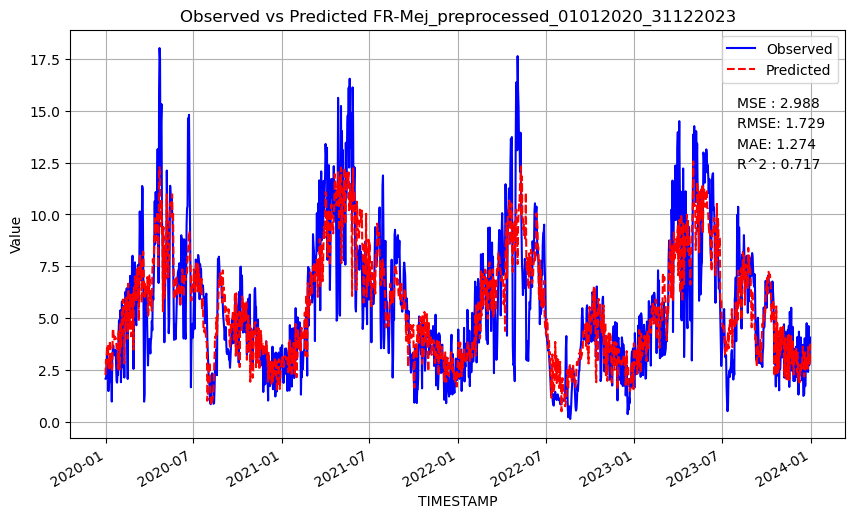

IT-Niv [3]
Mean Squared Error: 3.3653020109954475
Root Mean Squared Error: 1.8344759499637622
MAE: 1.518629686812681
Test R^2 Score: -0.24736546186383834


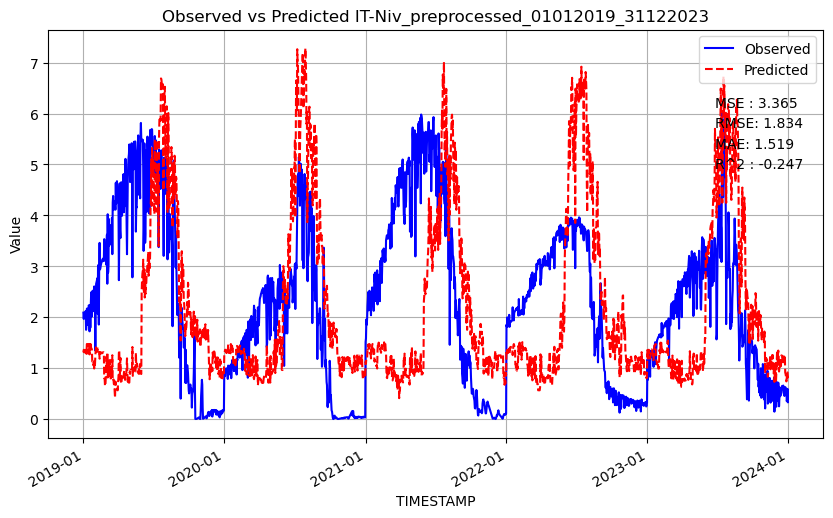

IT-SR2 [0]
Mean Squared Error: 2.8832924657593493
Root Mean Squared Error: 1.698026049788209
MAE: 1.3178096032905071
Test R^2 Score: 0.6993885077053569


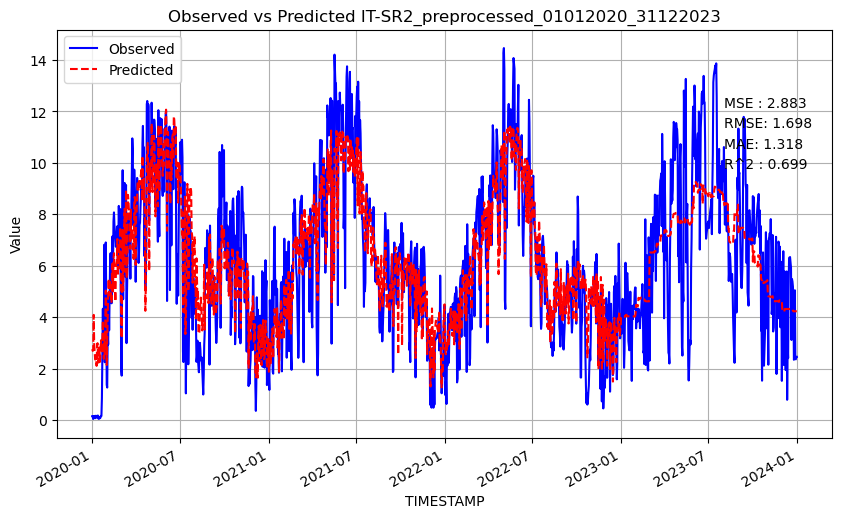

IT-Tor [2]
Mean Squared Error: 1.2134893120249597
Root Mean Squared Error: 1.101584909130912
MAE: 0.6708832135726327
Test R^2 Score: 0.8882271174184838


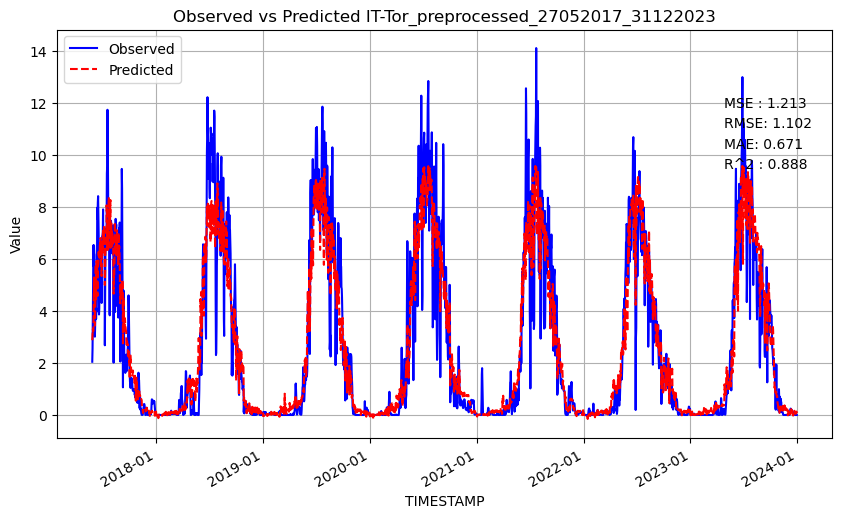

SE-Htm [1]
Mean Squared Error: 3.236384276416744
Root Mean Squared Error: 1.7989953519719677
MAE: 1.228451667591859
Test R^2 Score: 0.7984149730987949


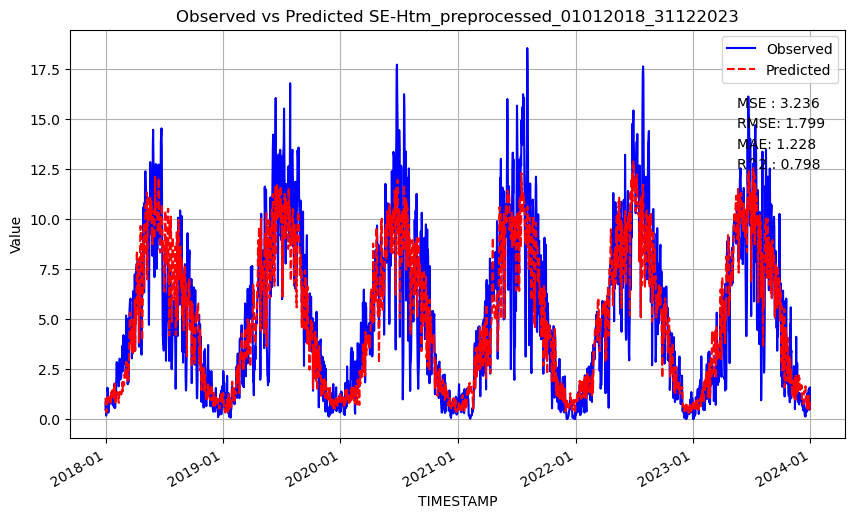

SE-Nor [10]
Mean Squared Error: 3.5093171145418367
Root Mean Squared Error: 1.8733171420082178
MAE: 1.528183480074949
Test R^2 Score: 0.7010461799804704


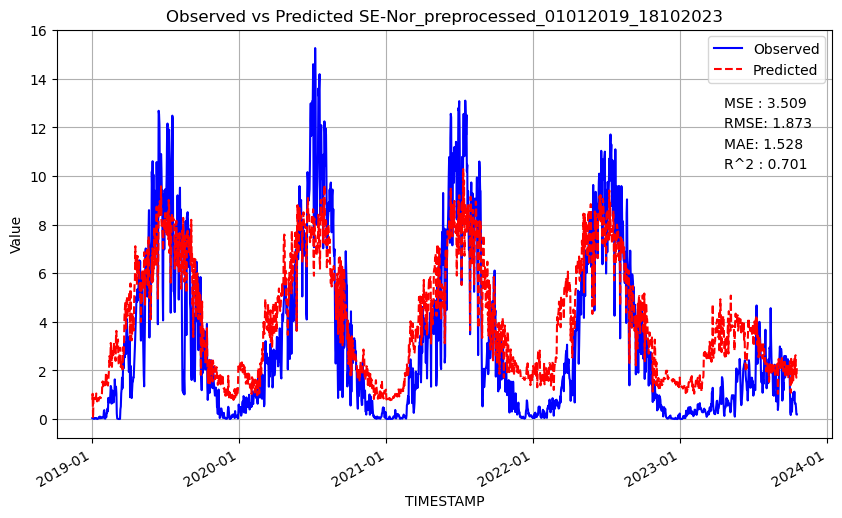

SE-Svb [9]
Mean Squared Error: 1.5912938117175934
Root Mean Squared Error: 1.261464946686032
MAE: 0.7660344784812878
Test R^2 Score: 0.861455611400687


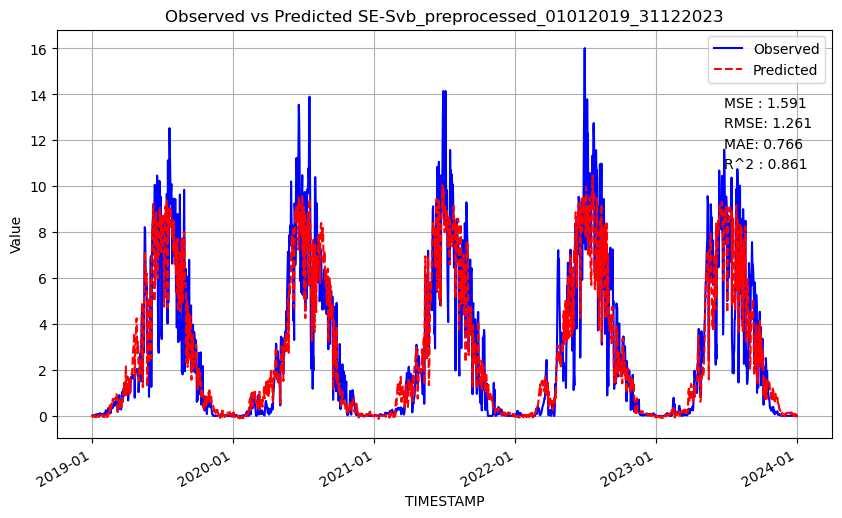



average MSE 2.6742668693150926
average RMSE 1.5933379495241888
average MAE 1.1645497278384807
average R2 0.7337899263228471


In [6]:
# Columns used for features
column = s2_era_general

# Parameters needed for XGBOOST
eta = 0.1
max_depth = 4
min_child_weight = 5
gamma = 0.1
alpha = 0.1 

param_values = {'eta': 0.1,
              'max_depth': 4,
              'min_child_weight': 5,
              'gamma': 0.1,
              'alpha': 0.1 
}

params = f"eta_{eta}_max_depth_{max_depth}_min_child_weight_{min_child_weight}_gamma_{gamma}_alpha_{alpha}"
print(params)


model = retrain_XGBOOST_single(combined_data , 'All', files_trainning, column, target_col, param_values, plot_directory_11_sites, params, directory_data)
sites_table = predict_all(sites_table, files_testing, model,params,column,plot_directory_11_sites, directory_data, target_col)

model.save_model(directory_model_11_sites)
sites_table.to_csv(os.path.join(plot_directory_11_sites,'analysis_results_12_sites_era.csv'), index=False) 

eta_0.1_max_depth_4_min_child_weight_5_gamma_0.1_alpha_0.1
Training and testing the model on the first site
DE-HoH
Mean Squared Error: 4.443810088827901
Root Mean Squared Error: 2.108034650765471
MAE: 1.4435249810162738
Test R^2 Score: 0.8420049659499809


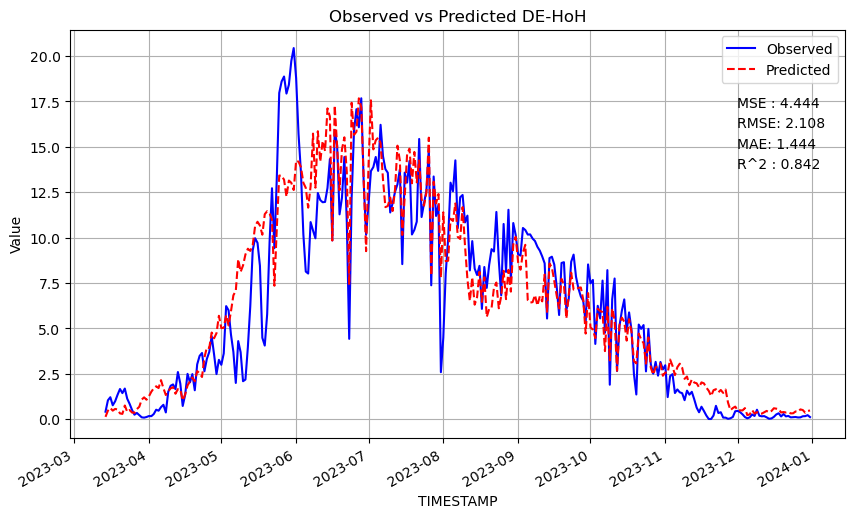

[('EVI', 0.38473913), ('NIGHT_RANDUNC_N', 0.1479731), ('DAY_D', 0.12704329), ('LSWI', 0.12087358), ('SW_IN_POT', 0.045469705), ('summer', 0.038003504), ('NDII', 0.02374453), ('SW_IN_F', 0.013662881), ('VPD_ERA', 0.008111035), ('SW_IN_ERA', 0.0069886465), ('TA_ERA_DAY_SD', 0.006748182), ('TA_ERA_DAY', 0.004787674), ('P_F', 0.004640835), ('TA_F', 0.0046366365), ('TA_F_MDS_NIGHT', 0.0045420406), ('MNDVI', 0.004506932), ('EVI2', 0.003289217), ('TA_ERA', 0.0030097237), ('VPD_F', 0.0027504757), ('NDVI', 0.0027112605), ('TA_F_MDS_DAY_SD', 0.0027051992), ('TS_F_MDS_1', 0.0026230125), ('day', 0.0026208349), ('TA_F_MDS', 0.0025913762), ('TA_ERA_NIGHT', 0.0024206191), ('LW_IN_JSB', 0.0023397738), ('CLr', 0.0021594493), ('PA_ERA', 0.0020476473), ('MNDWI', 0.0019165733), ('VPD_F_MDS', 0.0018123272), ('TA_ERA_NIGHT_SD', 0.0017542397), ('TA_F_DAY', 0.0015870789), ('LW_IN_F', 0.001526698), ('SW_IN_F_MDS', 0.0014863005), ('PA_F', 0.0014745513), ('USTAR', 0.0013414988), ('TA_F_MDS_NIGHT_SD', 0.001067596

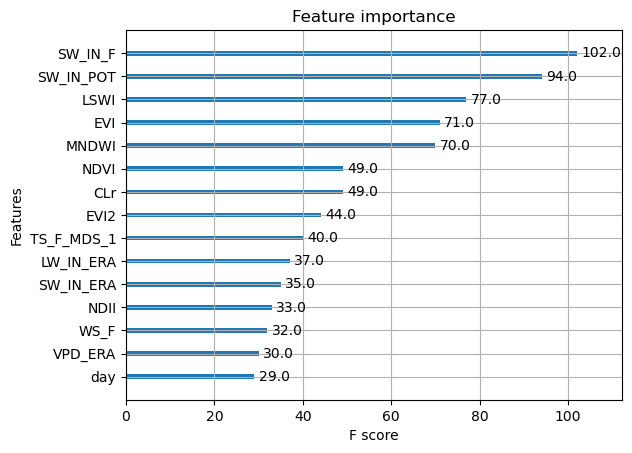

Retraining the model on the second site
IT-Tor
Mean Squared Error: 1.0083688689583628
Root Mean Squared Error: 1.0041757161763885
MAE: 0.5790460469518354
Test R^2 Score: 0.8828148888023428


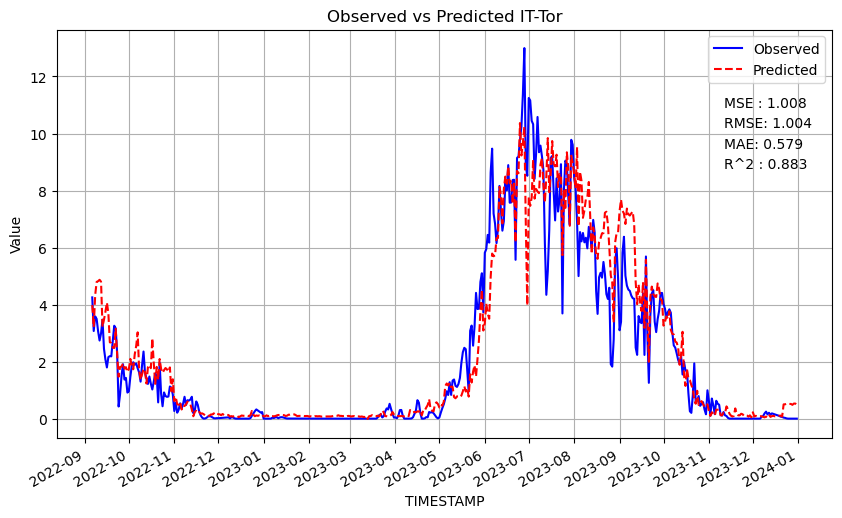

[('TS_F_MDS_1', 0.6022961), ('NIGHT_RANDUNC_N', 0.067282744), ('CLr', 0.049455676), ('MNDVI', 0.039825115), ('SW_IN_F', 0.018120987), ('EVI', 0.014671916), ('month', 0.013369312), ('SW_IN_POT', 0.012333274), ('EVI2', 0.01142064), ('MNDWI', 0.011334824), ('SW_IN_ERA', 0.011249052), ('P_F', 0.008396162), ('TA_ERA_NIGHT', 0.00808848), ('LSWI', 0.008047455), ('DAY_RANDUNC_N', 0.00715914), ('NDVI', 0.00710126), ('TA_F_DAY_SD', 0.0061827493), ('TA_F_MDS_DAY_SD', 0.0058409516), ('day', 0.005645766), ('WS_ERA', 0.005451951), ('NDII', 0.005279818), ('SW_IN_F_MDS', 0.005113732), ('TA_ERA', 0.0048919404), ('WS_F', 0.0045717335), ('DAY_D', 0.004528109), ('PA_F', 0.0043454105), ('LW_IN_F', 0.004287005), ('summer', 0.004274419), ('P_ERA', 0.004009016), ('PA_ERA', 0.003954677), ('USTAR', 0.003902226), ('TA_ERA_DAY', 0.0037185128), ('TA_F_MDS_NIGHT', 0.0032655864), ('TA_F_DAY', 0.0032351678), ('TA_F', 0.0031685417), ('VPD_F', 0.0031541612), ('LW_IN_JSB', 0.0030725978), ('TA_ERA_NIGHT_SD', 0.0029812444

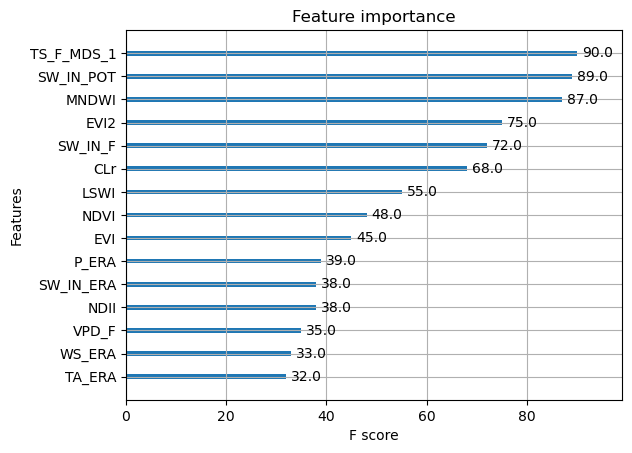

Retraining the model on the second site
FI-Hyy
Mean Squared Error: 1.3867130236358538
Root Mean Squared Error: 1.17758779869522
MAE: 0.7606895001175449
Test R^2 Score: 0.8862346031812333


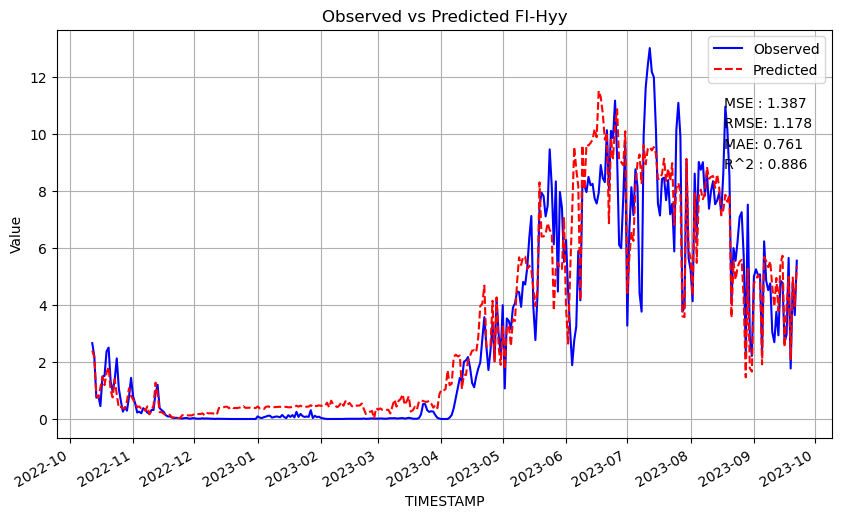

[('TA_F', 0.6778532), ('TA_F_DAY', 0.12033886), ('DAY_D', 0.036346734), ('TS_F_MDS_1', 0.026276443), ('SW_IN_ERA', 0.024173925), ('MNDVI', 0.01581679), ('SW_IN_F', 0.013873022), ('SW_IN_POT', 0.011699962), ('NIGHT_RANDUNC_N', 0.010018378), ('CLr', 0.009971593), ('SW_IN_F_MDS', 0.0049850885), ('TA_ERA_NIGHT', 0.004328798), ('EVI', 0.0040516267), ('TA_F_MDS_NIGHT', 0.003611392), ('VPD_ERA', 0.003423158), ('LSWI', 0.003303321), ('NDII', 0.0025796443), ('NDVI', 0.0020171748), ('P_F', 0.0018287639), ('MNDWI', 0.0014771154), ('PA_ERA', 0.0013268796), ('VPD_F_MDS', 0.0012625084), ('fall', 0.0012545862), ('VPD_F', 0.0012142682), ('EVI2', 0.0011447909), ('LW_IN_F', 0.0011063317), ('TA_F_MDS_DAY_SD', 0.0010507922), ('day', 0.00097555225), ('LW_IN_JSB_F', 0.00093262846), ('DAY_RANDUNC_N', 0.00091080804), ('P_ERA', 0.00078565447), ('TA_F_MDS', 0.0007432376), ('WS_ERA', 0.0007299461), ('USTAR', 0.00072392897), ('TA_ERA', 0.0006444587), ('TA_F_MDS_NIGHT_SD', 0.0006424627), ('TA_F_MDS_DAY', 0.0006286

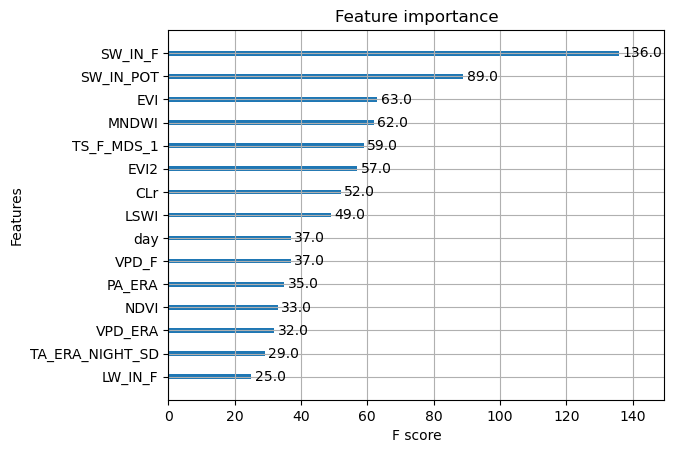

BE-Bra [17]
Mean Squared Error: 4.037952485838757
Root Mean Squared Error: 2.0094657214888634
MAE: 1.3885684429571323
Test R^2 Score: 0.7737634361393957


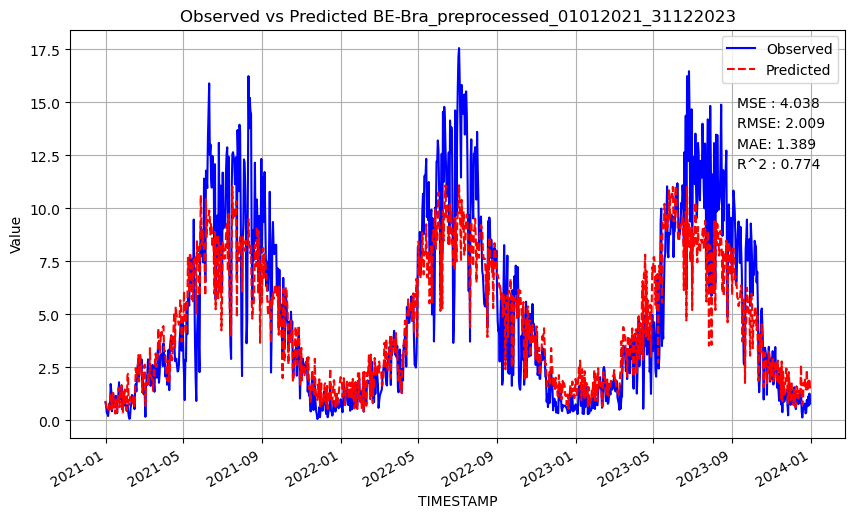

BE-Vie [16]
Mean Squared Error: 3.7009591642494675
Root Mean Squared Error: 1.9237877128855636
MAE: 1.4089129020895261
Test R^2 Score: 0.6940530447030356


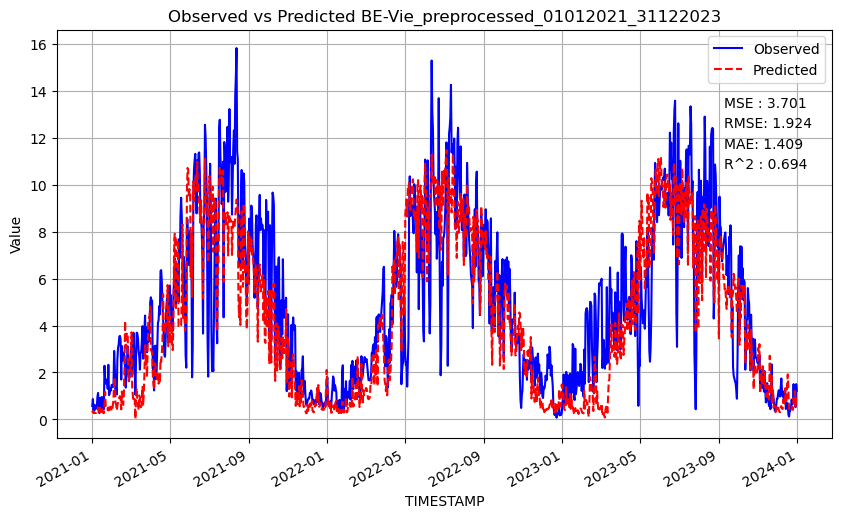

CH-Dav [8]
Mean Squared Error: 5.064548208547967
Root Mean Squared Error: 2.2504551114270126
MAE: 1.6197214353015241
Test R^2 Score: -0.10490689614636217


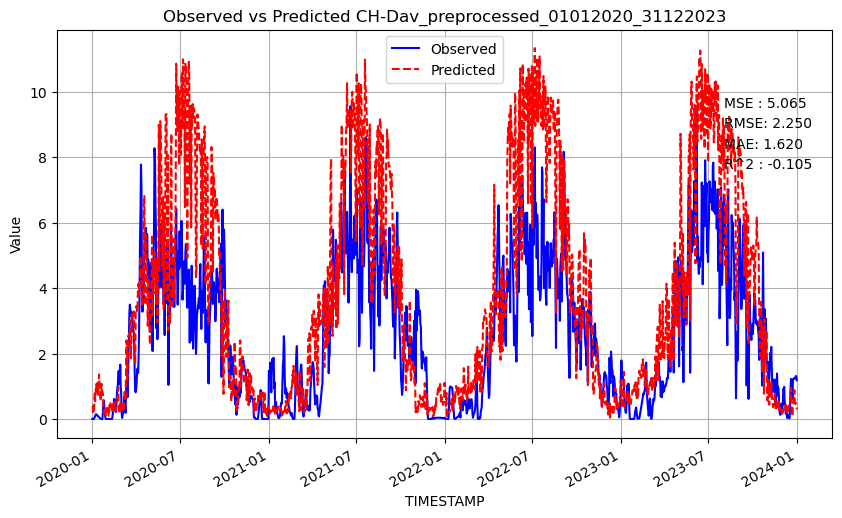

DE-Hai [7]
Mean Squared Error: 3.3952607199825877
Root Mean Squared Error: 1.8426233255830091
MAE: 1.3610287634965468
Test R^2 Score: 0.7882822744523574


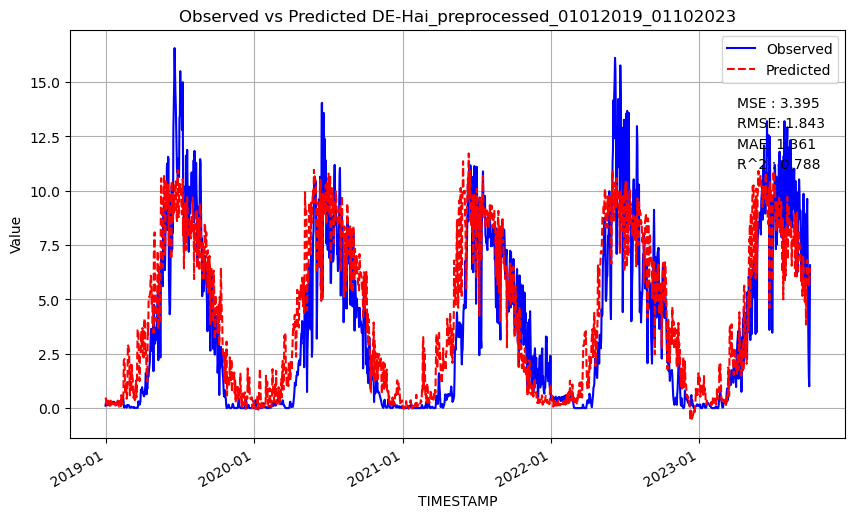

DE-Har [6]
Mean Squared Error: 2.768780708059631
Root Mean Squared Error: 1.6639653566284458
MAE: 1.1704335000197634
Test R^2 Score: 0.7416077976497536


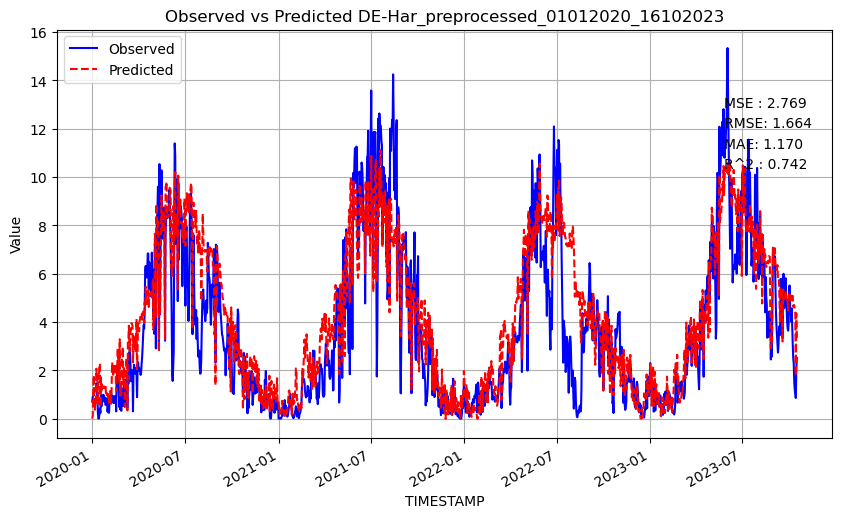

DE-HoH [15]
Mean Squared Error: 6.814456872185854
Root Mean Squared Error: 2.6104514690347824
MAE: 1.7931834190550953
Test R^2 Score: 0.7644262065512133


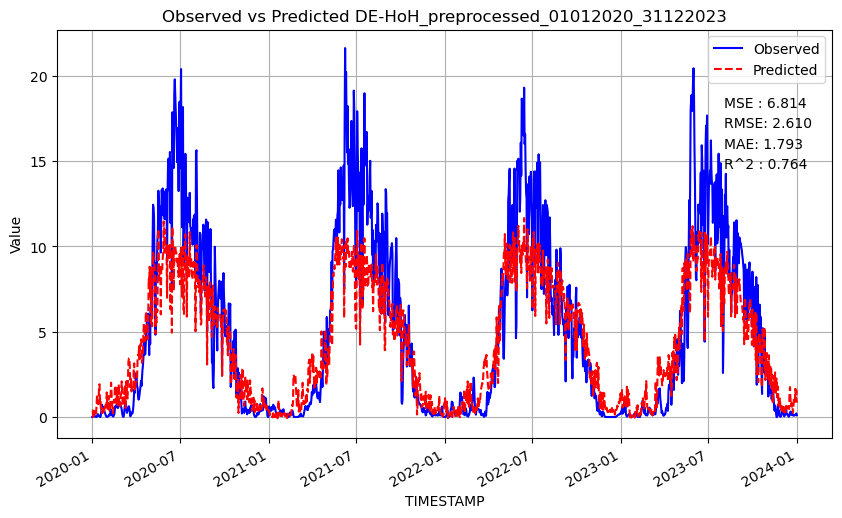

DE-Msr [5]
Mean Squared Error: 5.6416733429010755
Root Mean Squared Error: 2.375220693514831
MAE: 1.6938207279219282
Test R^2 Score: 0.4983496010557694


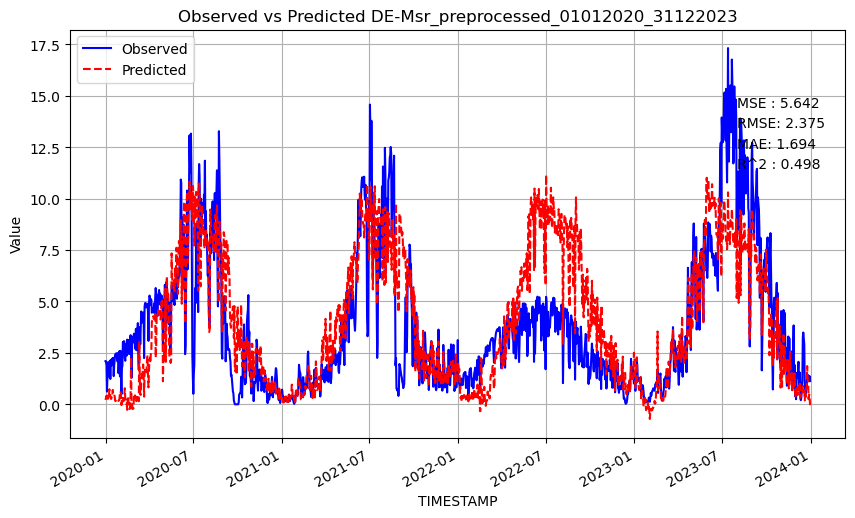

DE-Tha [14]
Mean Squared Error: 2.515148062854712
Root Mean Squared Error: 1.5859218337782957
MAE: 1.100849568365824
Test R^2 Score: 0.8017446880751253


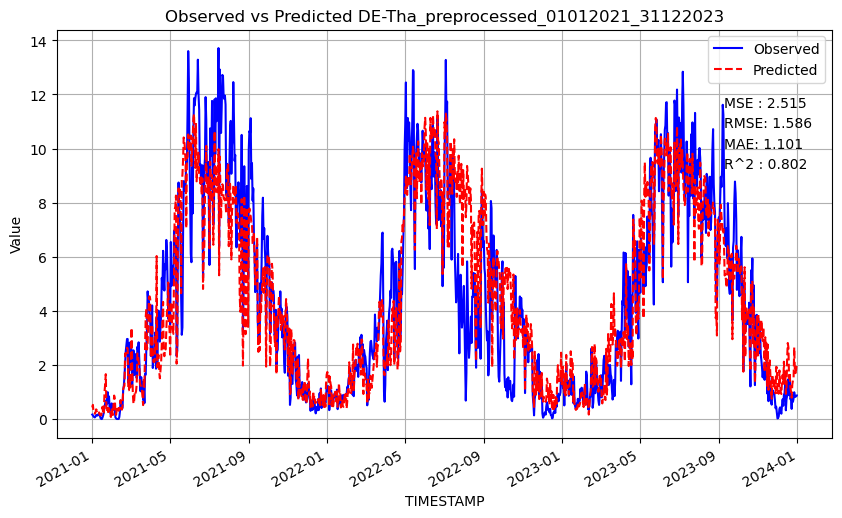

FI-Hyy [13]
Mean Squared Error: 0.3607585522513435
Root Mean Squared Error: 0.6006317942394854
MAE: 0.3227733874768909
Test R^2 Score: 0.966925238787107


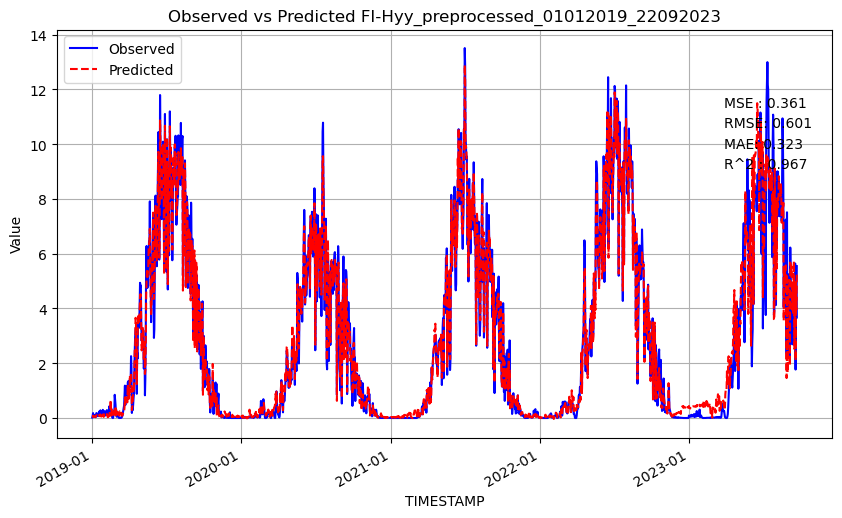

FR-Bil [12]
Mean Squared Error: 5.5483031926565705
Root Mean Squared Error: 2.3554836430458543
MAE: 1.850531318062506
Test R^2 Score: 0.5116314878086274


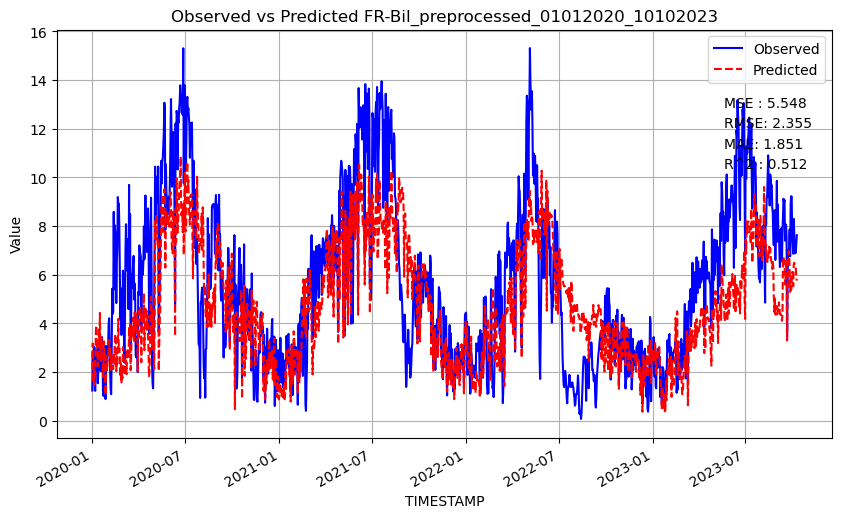

FR-Fon [11]
Mean Squared Error: 6.074771375843341
Root Mean Squared Error: 2.4647051295932623
MAE: 1.8853861559873304
Test R^2 Score: 0.7451145639009105


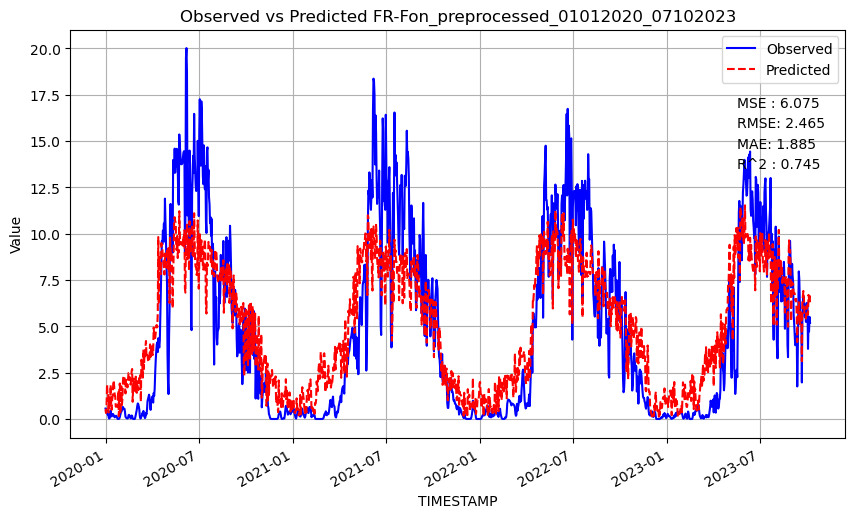

FR-Mej [4]
Mean Squared Error: 4.836937717760386
Root Mean Squared Error: 2.1993039166428057
MAE: 1.6066352169201723
Test R^2 Score: 0.542468811081461


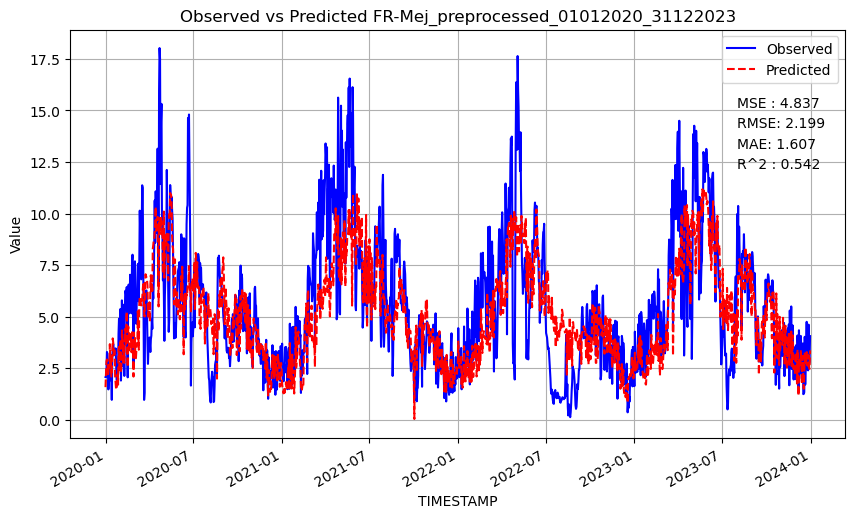

IT-Niv [3]
Mean Squared Error: 2.3026486813840994
Root Mean Squared Error: 1.5174480819402354
MAE: 1.2474364376376437
Test R^2 Score: 0.14651213276539388


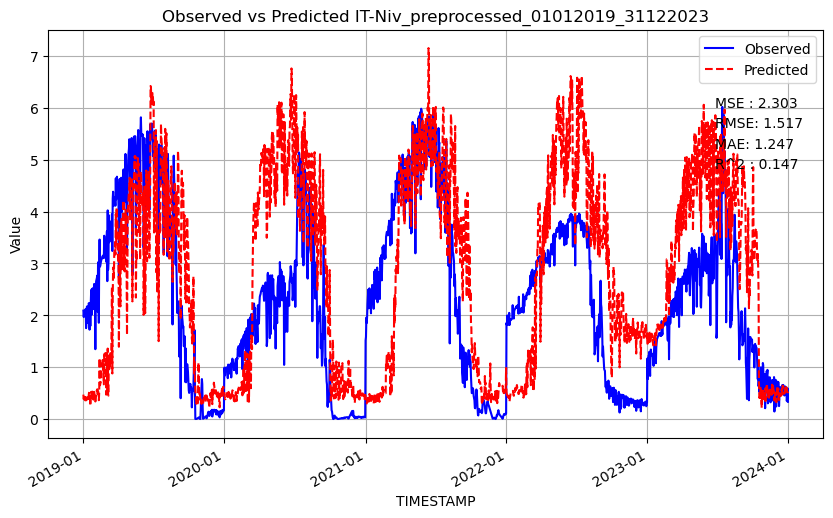

IT-SR2 [0]
Mean Squared Error: 4.575747672039192
Root Mean Squared Error: 2.1390997340094247
MAE: 1.6210674104611322
Test R^2 Score: 0.5229334684599258


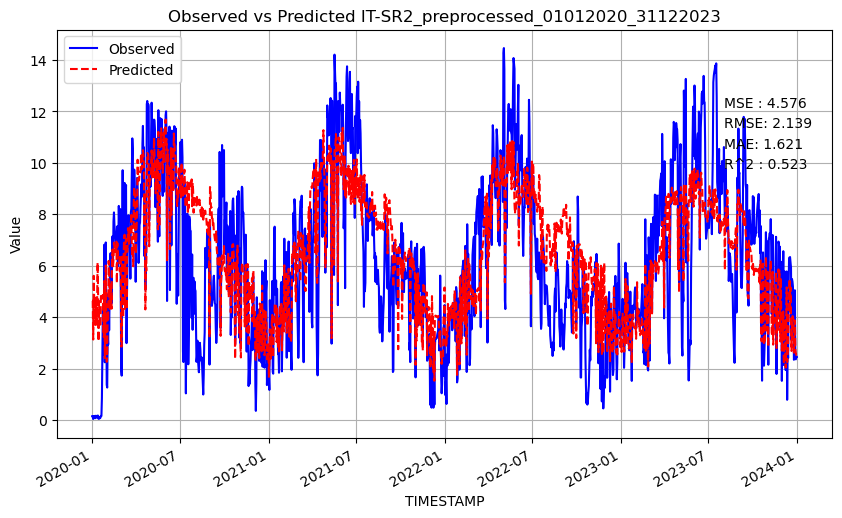

IT-Tor [2]
Mean Squared Error: 2.901001675432035
Root Mean Squared Error: 1.7032327132344645
MAE: 1.2394524051562015
Test R^2 Score: 0.732792603590581


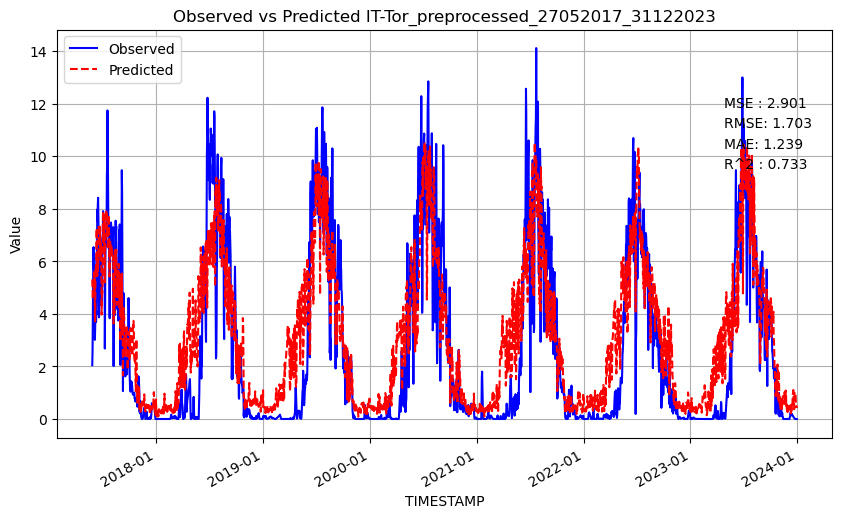

SE-Htm [1]
Mean Squared Error: 5.037317407340391
Root Mean Squared Error: 2.244396891670542
MAE: 1.6276773957883597
Test R^2 Score: 0.6862400511372824


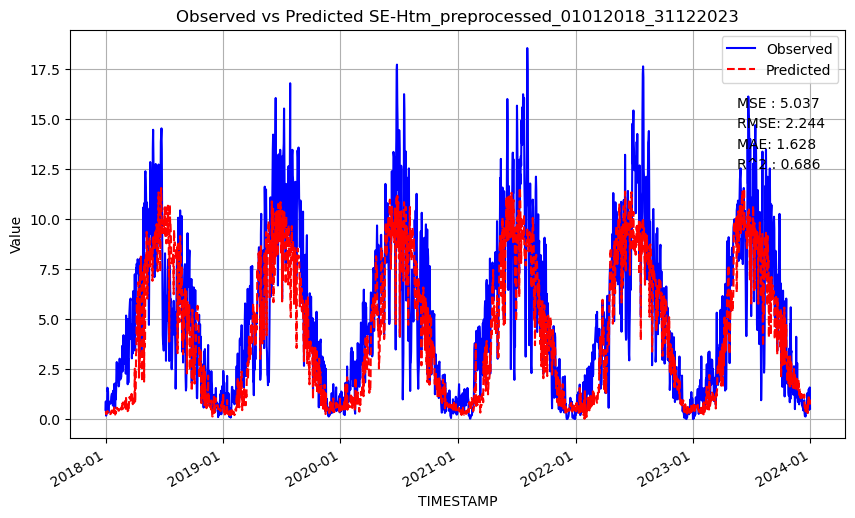

SE-Nor [10]
Mean Squared Error: 2.310819022058598
Root Mean Squared Error: 1.5201378299544412
MAE: 1.0023211932673828
Test R^2 Score: 0.8031445573397822


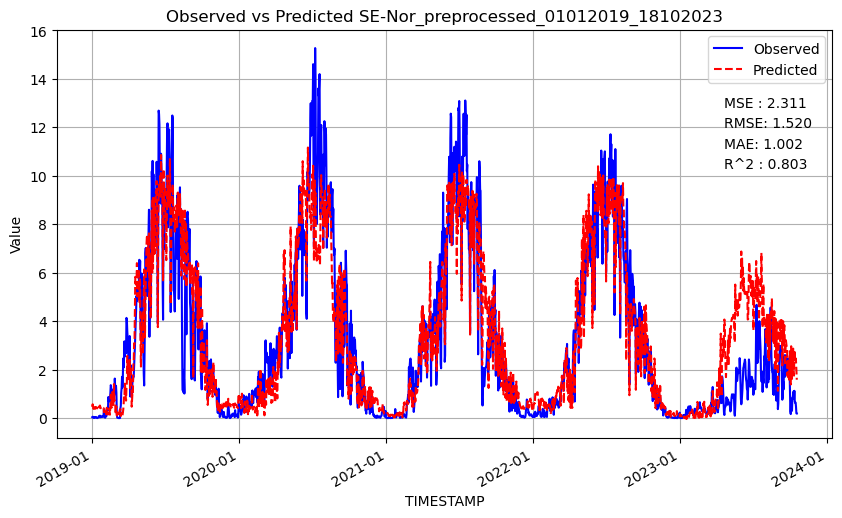

SE-Svb [9]
Mean Squared Error: 1.6089094313162309
Root Mean Squared Error: 1.2684279369819285
MAE: 0.753478039706384
Test R^2 Score: 0.8599219252711237


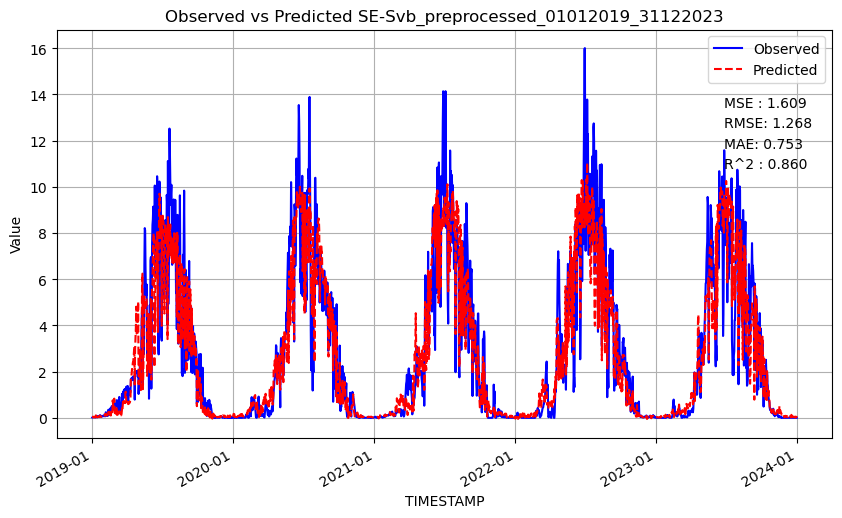



average MSE 3.860888571816792
average RMSE 1.9041532719807361
average MAE 1.3718487622039632
average R2 0.6375002773679157


In [7]:
# Columns used for features
column = s2_all

# Parameters needed for XGBOOST
eta = 0.1
max_depth = 4
min_child_weight = 5
gamma = 0.1
alpha = 0.1 

param_values = {'eta': 0.1,
              'max_depth': 4,
              'min_child_weight': 5,
              'gamma': 0.1,
              'alpha': 0.1 
}

# training sites
files_trainning =[
  'DE-HoH_preprocessed_01012020_31122023.csv',
  'IT-Tor_preprocessed_27052017_31122023.csv',
  'FI-Hyy_preprocessed_01012019_22092023.csv',
  ]

params = f"eta_{eta}_max_depth_{max_depth}_min_child_weight_{min_child_weight}_gamma_{gamma}_alpha_{alpha}"
print(params)

model = retrain_XGBOOST(files_trainning, column, target_col, param_values, plot_directory_3_sites, params, directory_data)
sites_table = predict_all(sites_table, files_testing, model,params,column,plot_directory_3_sites, directory_data, target_col)

model.save_model(directory_model_3_sites)
sites_table.to_csv(os.path.join(plot_directory_3_sites,'analysis_results_3_sites_era.csv'), index=False) 